### Example 01. Datasets and Dataloaders

This example notebook is inded to serve as a guide for csl datasets module and its associated load and dataloader methods.


In [2]:
import torch
import torchvision

import os
os.chdir("../")

import csl.datasets as dset
import csl.utils.utils as cutils

**A. Loading a dataset**

`load(name)`: loads any supported dataset
  * Standard dataset: native dataset from torchvision
  * Synthetic dataset: expected in ImageFolder structure (uses torchvision.datasets.ImageFolder)


  * **Inputs:** 
      * `name`: str,  the name of the dataset
      * `image_size`: [optional] int, the square pixels dimensions used to resize images and ensure compliance. Default value is defined in `dataset.IMAGE_DIMS`
      * `data_directory`: [optional] str, path to the folder dataset in the system (where the dataset is stored). Default value is defined in `datasets.DATA_DIR`


  * **Returns:** (train_set, test_set)
    - train_set: torchvision.datasets
    - test_set: torchvision.datasets


  * **Alternatively:** see `Dataset.load()` for datasets and customized train and test transforms.

In [3]:
# loads the vae-synthesized version of fashion-mnist 
DS_NAME = "fashion-mnist_vae"

train_ds, test_ds = dset.load(DS_NAME)

# get some help and additional information by printing the `help`
# help(train_ds)

2020-12-08 10:44:58 ubu0789 csl.datasets[15784] INFO Processing 'fashion-mnist_vae' ImageFolder structure


**B. Creating a set of dataloaders (train & test)**

`get_dataloaders(name)`: wraps around the `load` method to create dataloaders of a single supported type
  * Standard dataset: native dataset from torchvision
  * Synthetic dataset: expected in ImageFolder structure (uses torchvision.datasets.ImageFolder)


  * **Inputs:** 
      * `name`: str,  the name of the dataset
      * `image_size`: [optional] int, the square pixels dimensions used to resize images and ensure compliance. Default value is defined in `dataset.IMAGE_DIMS`      
      * `batch_size`: [optional] int, the square pixels dimensions used to resize images and ensure compliance. Default value is 16.
      * `num_workers`: [optional] int, the number of workers to use in dataloading (moving from memory to cpu or gpu). Default value is 2.
      * `class_idx`: [optional], int, the index number of the class to select from the dataset (e.g., set class_idx = 0, to select only 0-class samples). The default value is 'all' and returns all classes.
      * `num_samples`: [optional] int, the number of samples to return (i.e., set it to 5, 29, etc. to return a very specific number of samples.). It must be smaller or equal than the number of actual dataset samples for that class. Default value is 'all' and returns all available samples.`
      * `data_directory`: [optional] str, path to the folder dataset in the system (where the dataset is stored). Default value is defined in `datasets.DATA_DIR`


  * **Returns:** (train_loader, test_loader)
      - train_loader: torch.utils.data.DataLoader
      - test_loader: torch.utils.data.DataLoader


  * **Alternatively:** see `Dataset.create_dataloaders()` for datasets and customized train and test transforms.

2020-12-08 10:46:59 ubu0789 csl.datasets[15784] INFO Processing 'mnist' torch.vision built-in structure
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


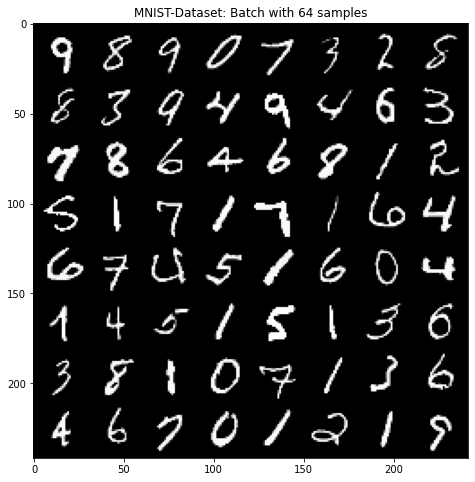

In [9]:
BATCH_SIZE = 64
DS_NAME = "mnist"
train_loader, test_loader = dset.get_dataloaders(DS_NAME, batch_size=BATCH_SIZE)

# visualize the batch
batch, labels = next(iter(train_loader))
plot_title = f"{DS_NAME.upper()}-Dataset: Batch with {BATCH_SIZE} samples"
cutils.visualize_batch(batch, plot_title=plot_title, grid_dims=BATCH_SIZE**.5)


**C. Creating a set of dataloaders (train & test)**

`get_hybrid_dataloaders`: wraps around the `Dataset.load()` and `Dataset.create_dataloaders()` methods to create hybrid dataloaders (native + synthetic) versions 
  * Standard dataset: native dataset from torchvision
  * Synthetic dataset: expected in ImageFolder structure (uses torchvision.datasets.ImageFolder)


  * **Inputs:** 
      * `name`: str, the name of the dataset
      * `image_size`: [optional] int, the square pixels dimensions used to resize images and ensure compliance. Default value is defined in `dataset.IMAGE_DIMS`      
      * `method`: str, the name of the method used to synthesized the dataset (supported: vae, cvae, dcgan). Default value = 'vae'.
      * `batch_size`: [optional] int, the square pixels dimensions used to resize images and ensure compliance. Default value is 16.
      * `original_portion`: [optional] float, stratified portion of the original data used in the expected dataloader. Default value is 0.5. (e.g., 50% of the original dataset with similar data-label distribution).
      * `synthetic_portion`: [optional] float, stratified portion of the synthetic data used in the expected dataloader. Default value is 0.5. (e.g., 50% of the synthetic dataset with similar data-label distribution).
      * `num_workers`: [optional] int, the number of workers to use in dataloading (moving from memory to cpu or gpu). Default value is 2.
      * `class_idx`: [optional], int, the index number of the class to select from the dataset (e.g., set class_idx = 0, to select only 0-class samples). The default value is 'all' and returns all classes.
      * `num_samples`: [optional] int, the number of samples to return (i.e., set it to 5, 29, etc. to return a very specific number of samples.). It must be smaller or equal than the number of actual dataset samples for that class. Default value is 'all' and returns all available samples.`
      * `data_directory`: [optional] str, path to the folder dataset in the system (where the dataset is stored). Default value is defined in `datasets.DATA_DIR`


  * **Returns:** (train_loader, test_loader)
      - train_loader: torch.utils.data.DataLoader
      - test_loader: torch.utils.data.DataLoader


  * **Alternatively:** see `Dataset.create_hybrid_dataloaders()` for datasets and customized train and test transforms.

2020-12-08 10:44:59 ubu0789 csl.datasets[15784] INFO Processing 'fashion-mnist' torch.vision built-in structure
2020-12-08 10:44:59 ubu0789 csl.datasets[15784] INFO Loaded complete original 'fashion-mnist' dataset with 60000 training data and 10000 test data.
2020-12-08 10:44:59 ubu0789 csl.datasets[15784] INFO  > Splitted original 'fashion-mnist' dataset with 15000 training data and 10000 test data.
2020-12-08 10:44:59 ubu0789 csl.datasets[15784] INFO Processing 'fashion-mnist_vae' ImageFolder structure
2020-12-08 10:44:59 ubu0789 csl.datasets[15784] INFO  Loaded complete synthetic 'fashion-mnist_vae'  dataset with 60000 training data and 10000 test data.
2020-12-08 10:44:59 ubu0789 csl.datasets[15784] INFO  > Splitted synthetic 'fashion-mnist_vae' dataset with 15000 training data and 10000 test data.
2020-12-08 10:44:59 ubu0789 csl.datasets[15784] INFO Constructed a hybrid 'fashion-mnist_vae' dataset with 0.25-original and 0.25-hybrid portions to produce 30000 training and 10000 test

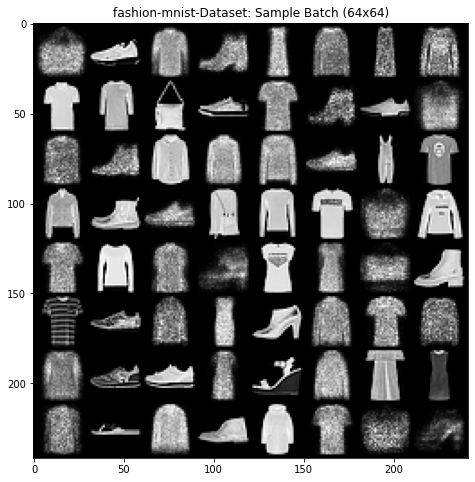

In [5]:
NUM_WORKERS = 4
BATCH_SIZE = 64

DS_NAME = "fashion-mnist"
SYN_METHOD = "vae"
ORIGINAL_PORTION = .25
SYNTHETIC_PORTION = .25

kwargs = {
    "dataset_name": DS_NAME,
    "method": SYN_METHOD,
    "batch_size": BATCH_SIZE,
    "original_portion": ORIGINAL_PORTION,
    "synthetic_portion": SYNTHETIC_PORTION,
    "num_workers": NUM_WORKERS,
    # "data_directory": data_directory,
    # "input_size": image_size,
}


train_loader, test_loader = dset.get_hybrid_dataloaders(**kwargs)

batch, labels = next(iter(train_loader))

# visualize the batch
plot_title = f"{DS_NAME}-Dataset: Sample Batch ({BATCH_SIZE}x{BATCH_SIZE})"
cutils.visualize_batch(batch, plot_title=plot_title, grid_dims=BATCH_SIZE**.5)